In [3]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver

This function plots conductor temperatures (surface, average and core) when a step of transit occurs. Simulation made with the 3t solver and RTE power terms. 

In [7]:
def example_solver3t_transient(dic):

    # create solver with rte power terms and 3t heat equation
    slvr = solver.rte(dic, heateq="3t")

    # change solver args to get initial state, compute initial values of surface
    # and core temperature using steady temperature
    slvr.args["I"] = 400.
    slvr.update()
    dtstdy = slvr.steady_temperature()
    T_surf = dtstdy['t_surf'].values
    T_core = dtstdy['t_core'].values

    # restore initial transit in dic
    slvr.args["I"] = dic["I"]
    slvr.update()


    # compute temperature
    dtemp = slvr.transient_temperature(t, Ts0=T_surf, Tc0=T_core, return_power=True)

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    tm = t / 60
    ax.fill_between(tm, dtemp['t_surf'], dtemp['t_core'], fc='gray', alpha=0.33, ec=None)
    ax.plot(tm, dtemp['t_surf'], c='C0', label='Surface Conductor temperature (C)')
    ax.plot(tm, dtemp['t_avg'], c='C1', label='average Conductor temperature (C)')
    ax.plot(tm, dtemp['t_core'], c='C3', label='Core Conductor temperature (C)')
    ax.set_xlabel("Time (hour)")
    ax.set_ylabel("Temperature (C)")
    ax.grid(True)
    ax.legend()
    %matplotlib inline
    plt.show()

In [8]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")

# Generate input dict (for the sake of simplicity, only a few inputs are
# used, the rest is filled with default values).
dic = dict(
    lat=46.1,
    alt=123.0,
    azm=31.0,
    month=6,
    day=20,
    hour=0.,
    I=700.,
)
t = np.linspace(0, 3600, 901)



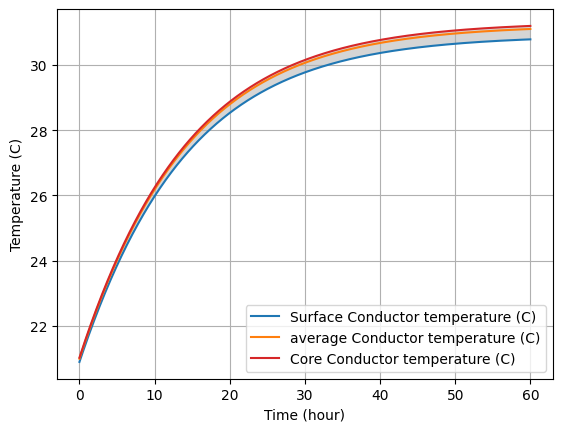

In [9]:
example_solver3t_transient(dic)